In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName, delim = '\t'):
    """
       函数说明：加载数据集
       parameters:
           fileName -数据集名称
           delim -分隔符
       return:
       mat(datArr) -数据矩阵
    """   
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr] 
    return mat(datArr)  # 转换为二维的数组便于运算

In [3]:
def pca(dataMat, topNfeat = 9999999):
    """
    函数说明：PCA算法实现
    parameters:
        dataMat -用于进行PCA操作的数据集
        topNfeat -应用的N个特征
    return:
        lowDataMat -将维后的数据集
        reconMat -重构的数据集
"""
    meanVals = mean(dataMat,axis=0)  # 按列求均值
    meanRemoved = dataMat - meanVals             # 去平均值每个值减去该列的平均值（后面有解释为什么要去均值）
    #计算协方差矩阵，除数n-1是为了得到协方差的无偏估计
    #cov(X,0) = cov(X) 除数是n-1(n为样本个数)
    #cov(X,1) 除数是n
    covMat = cov(meanRemoved,rowvar=0)           # 协方差矩阵计算 （rowvar=0 后面有解释这个参数的重要意义）
    eigVals,eigVects = linalg.eig(mat(covMat))   # 分解计算协方差矩阵的（特征值 特征向量）
    eigValInd = argsort(eigVals)                 # 获取从小到大排序特征值的下标 于sort有差别
    eigValInd = eigValInd[:-(topNfeat+1):-1]     # 获得最大的特征值的下标N个 (起始位置:结束位置:步长   步长为负则从右往左取；结束位置步长同时为负则从右排列向左排列)
    redEigVects = eigVects[:,eigValInd]          # 保留N个特征值最大列的特征向量 (即数据方差最大的N个方向)
    lowDDataMat = meanRemoved * redEigVects      # 将数据转换到新空间 （用特征向量*数据集）
    reconMat = (lowDDataMat * redEigVects.T) + meanVals # 利用降维后的矩阵反构出原始矩阵（作用：用作测试，可以和未压缩的原矩阵比较）
    return lowDDataMat,reconMat   # 压缩后的矩阵 反构出的原始矩阵

In [13]:
def drawDataSet(dataMat, reconMat):
    """
    函数说明：绘制数据集
    parameters:
        dataMat -原始数据集
        reconMat -重构数据集
    return:
        A picture
    """   
    
    # 画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(lowDMat[:,0].flatten().A[0],zeros(len(lowDMat)))   # 降维后的图
#     ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker='^',s=90)
#     ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='o',s=50,c='red')
    plt.show()

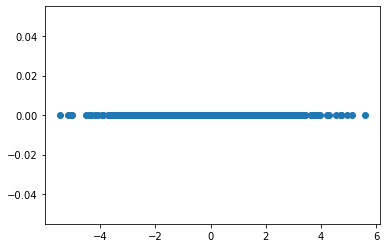

In [14]:
if __name__ =='__main__':
    
    """
    按照PCA原理来调用上述函数
    """
    
    dataMat = loadDataSet('PCAData.txt')
    lowDMat,reconMat = pca(dataMat,1)    # 返回了 降维后的数据 反构出的原始数据
    drawDataSet(dataMat, reconMat)